In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Position'
]

In [3]:
FF18 = pd.read_csv('data/Dataset.csv')
premier_league = pd.read_csv('data/premier-league-teams-2019.csv', header=0, index_col=0)

In [4]:
FF18 = pd.DataFrame(FF18, columns=interesting_columns)
FF18.head(1).T

,0
Name,T. Pukki
Age,28
Nationality,Finland
Overall,76
Potential,76
Club,Norwich City
Value,€8M
Wage,€32K
Position,ST|CF


In [5]:
premier_league['League'] = 'English Premier League'
prem_teams = FF18.merge(premier_league, on=["Club"])
prem_teams = prem_teams[prem_teams.Club.isin(premier_league.Club)]
FF18 = prem_teams
FF18.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,League
0,T. Pukki,28,Finland,76,76,Norwich City,€8M,€32K,ST|CF,English Premier League
1,T. Cantwell,20,England,67,78,Norwich City,€1.3M,€7K,LM|CAM,English Premier League
2,M. Aarons,18,England,71,85,Norwich City,€4.4M,€7K,RB,English Premier League


In [6]:
FF18.fillna(value=0, inplace=True)
FF18.dropna(inplace=True)

In [7]:
# Supporting function for converting string values into numbers
import re
def str2number(amount):
    if amount[-1] == 'M':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000000
    elif amount[-1] == 'K':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000
    else:
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)
    
FF18['ValueNum'] = FF18['Value'].apply(lambda x: str2number(x))
FF18['WageNum'] = FF18['Wage'].apply(lambda x: str2number(x))

In [8]:
FF18.head(1).T

,0
Name,T. Pukki
Age,28
Nationality,Finland
Overall,76
Potential,76
Club,Norwich City
Value,€8M
Wage,€32K
Position,ST|CF
League,English Premier League


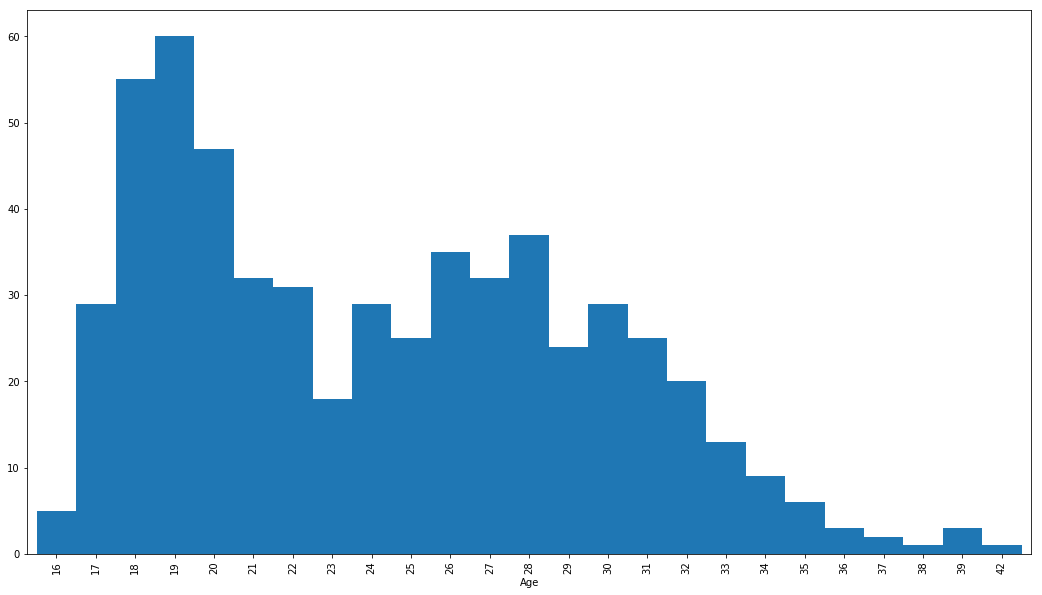

In [9]:
plt.figure(figsize=(18, 10))
FF18.groupby('Age')['Age'].count().plot(kind='bar', width=1)
plt.show()

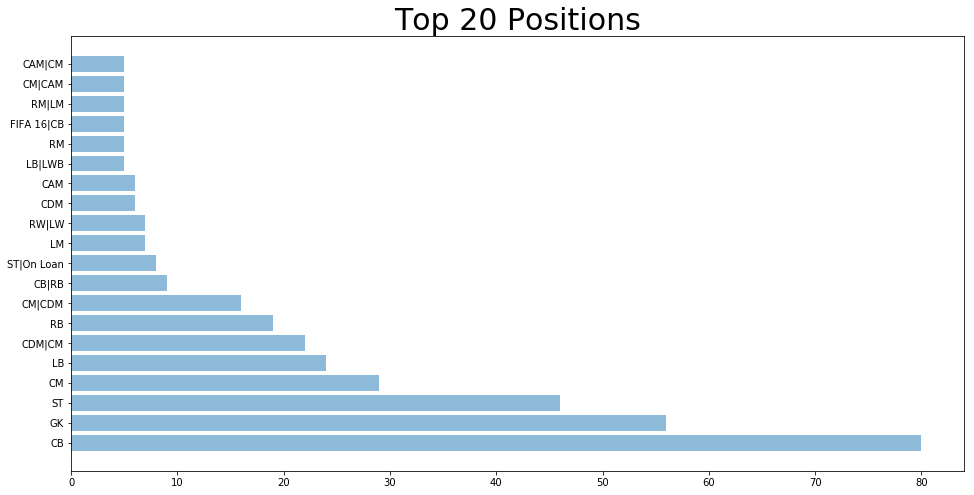

In [10]:
plt.figure(figsize=(16,8))
teams = FF18.groupby('Position')['Name'].count().reset_index()
teams = teams.sort_values('Name', ascending=False).head(20)
plt.barh(teams['Position'], teams['Name'], align='center', alpha=0.5)
plt.title('Top 20 Positions', fontsize=30)
plt.show()

In [11]:
def get_best_squad_n(formation, league, measurement = 'Overall'):
    FF18_copy = FF18.copy()
    FF18_copy = FF18_copy[FF18_copy['League'] == league]
    store = []
    for i in formation:
        store.append([
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].max(),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        FF18_copy.drop(FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax(), inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [12]:
def get_summary_n(squad_list, squad_name, league_list):
    summary = []
    for i in league_list:
        count = 0
        for j in squad_list:
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, league = i, measurement = 'Overall') 
            summary.append([i, squad_name[count], O_temp_rating.round(2)])    
            count += 1
    return summary

In [13]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']


In [14]:
FF18.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,League,ValueNum,WageNum
0,T. Pukki,28,Finland,76,76,Norwich City,€8M,€32K,ST|CF,English Premier League,8000000.0,32000.0
1,T. Cantwell,20,England,67,78,Norwich City,€1.3M,€7K,LM|CAM,English Premier League,1300000.0,7000.0
2,M. Aarons,18,England,71,85,Norwich City,€4.4M,€7K,RB,English Premier League,4400000.0,7000.0
3,E. Buendía,21,Argentina,74,81,Norwich City,€8M,€19K,RM,English Premier League,8000000.0,19000.0
4,J. Lewis,20,Northern Ireland,71,82,Norwich City,€3.6M,€12K,LB,English Premier League,3600000.0,12000.0


In [15]:
teams = FF18.groupby('League')['Name'].count().reset_index()
for league in teams['League']:
    c = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, [league])), columns = ['Nationality', 'Squad', 'Overall']) 
    print(c)
    rating_433_Overall, best_list_433_Overall = get_best_squad_n(squad_433_strict, league, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_433_Overall))
    print(best_list_433_Overall)


              Nationality    Squad Overall
0  English Premier League    3-4-3   87.27
1  English Premier League    4-4-2   87.45
2  English Premier League  4-3-1-2   87.82
3  English Premier League    4-3-3   87.64
4  English Premier League  4-2-3-1   87.82
-Overall-
Average rating: 87.6
Position            Player Overall  Age                Club    Value    Wage
      GK            De Gea      90   27   Manchester United   €62.5M   €215K
      RB         K. Walker      84   28     Manchester City   €24.5M   €165K
      CB   T. Alderweireld      87   29   Tottenham Hotspur     €39M   €165K
      CB     J. Vertonghen      87   31   Tottenham Hotspur     €34M   €155K
  LB|LWB     Marcos Alonso      83   27             Chelsea   €21.5M   €130K
  CDM|CM          N. Kanté      89   27             Chelsea     €63M   €225K
  CM|CAM          P. Pogba      88   25   Manchester United     €73M   €255K
  CAM|CM        C. Eriksen      88   26   Tottenham Hotspur   €69.5M   €205K
   RW|ST          